In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
store = pd.read_csv('store.csv',low_memory=False)

In [5]:
store.shape

(1115, 10)

In [6]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
train = pd.read_csv('train.csv')

In [8]:
train.shape

(1017209, 9)

In [9]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
df = store.merge(train,on=['Store'],how='inner')

In [11]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [12]:
df.shape

(1017209, 18)

In [13]:
len(df['Store'].unique())

1115

In [14]:
len(df['Date'].unique())

942

In [15]:
df['Sales'].mean()

5773.818972305593

In [16]:
df.groupby('Store')['Sales'].mean()

Store
1        3945.704883
2        4122.991507
3        5741.253715
4        8021.769639
5        3867.110403
            ...     
1111     4342.968153
1112     8465.280255
1113     5516.180467
1114    17200.196391
1115     5225.296178
Name: Sales, Length: 1115, dtype: float64

In [17]:
df.groupby('DayOfWeek')['Sales'].count()

DayOfWeek
1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
Name: Sales, dtype: int64

In [18]:
df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [19]:
df['DayOfWeek'].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [20]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [21]:
df['Year'] = df['Date'].dt.year

In [22]:
df['Quarter'] = df['Date'].dt.quarter

In [23]:
df['Month'] = df['Date'].dt.month

In [24]:
df['Week'] = df['Date'].dt.isocalendar().week

In [25]:
df['day'] = df['Date'].dt.day

In [26]:
df['Season'] = np.where(df['Month'].isin([3,4,5]),'Spring',
                       np.where(df['Month'].isin([6,7,8]),'Summer',
                       np.where(df['Month'].isin([9,10,11]),'Fall',
                       np.where(df['Month'].isin([12,1,2]),'Winter','None'))))

In [27]:
season_map = {
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall',
    12: 'Winter', 1: 'Winter', 2: 'Winter'
}
df['Season1'] = df['Month'].map(season_map).fillna('None')
df[['Season1']].head()

,Season1
0,Summer
1,Summer
2,Summer
3,Summer
4,Summer


In [28]:
del df['Season1']

In [29]:
df.iloc[:,18:]

,Year,Quarter,Month,Week,day,Season
0,2015,3,7,31,31,Summer
1,2015,3,7,31,30,Summer
2,2015,3,7,31,29,Summer
3,2015,3,7,31,28,Summer
4,2015,3,7,31,27,Summer
...,...,...,...,...,...,...
1017204,2013,1,1,1,5,Winter
1017205,2013,1,1,1,4,Winter
1017206,2013,1,1,1,3,Winter
1017207,2013,1,1,1,2,Winter


In [30]:
df['Week'].max()

52

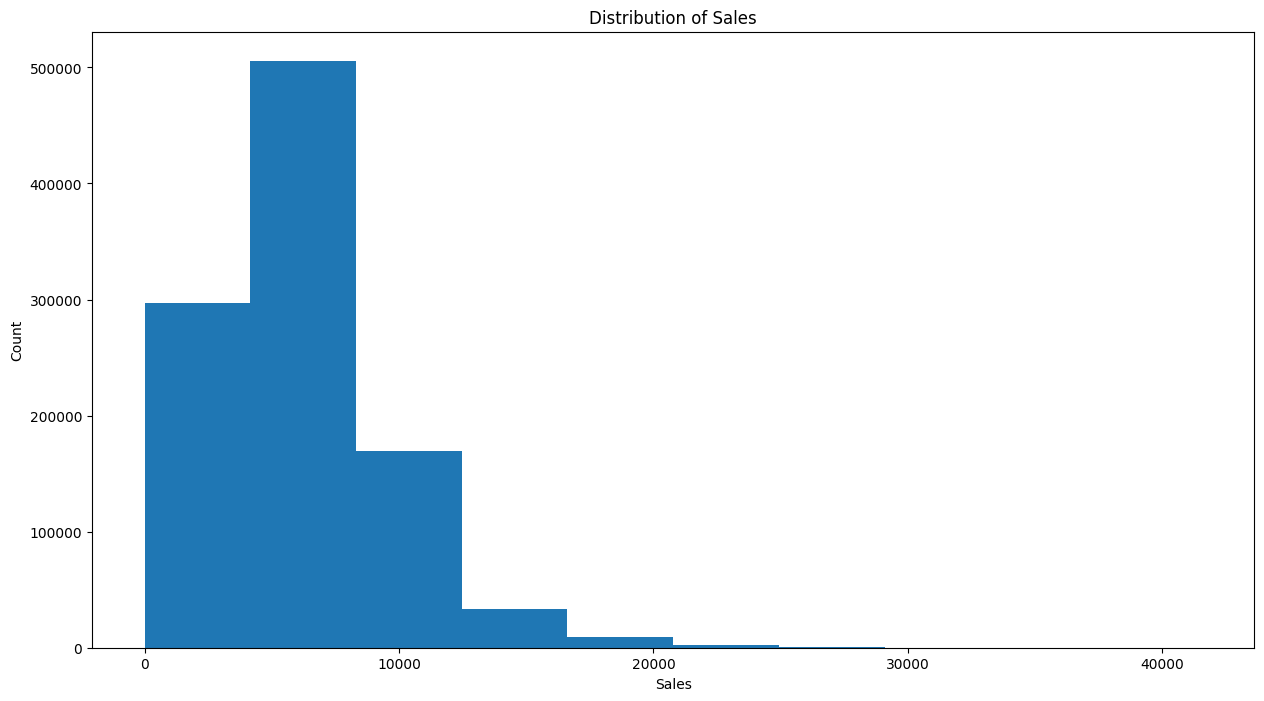

In [31]:
plt.figure(figsize=(15,8))
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.hist(df['Sales'])
plt.show()

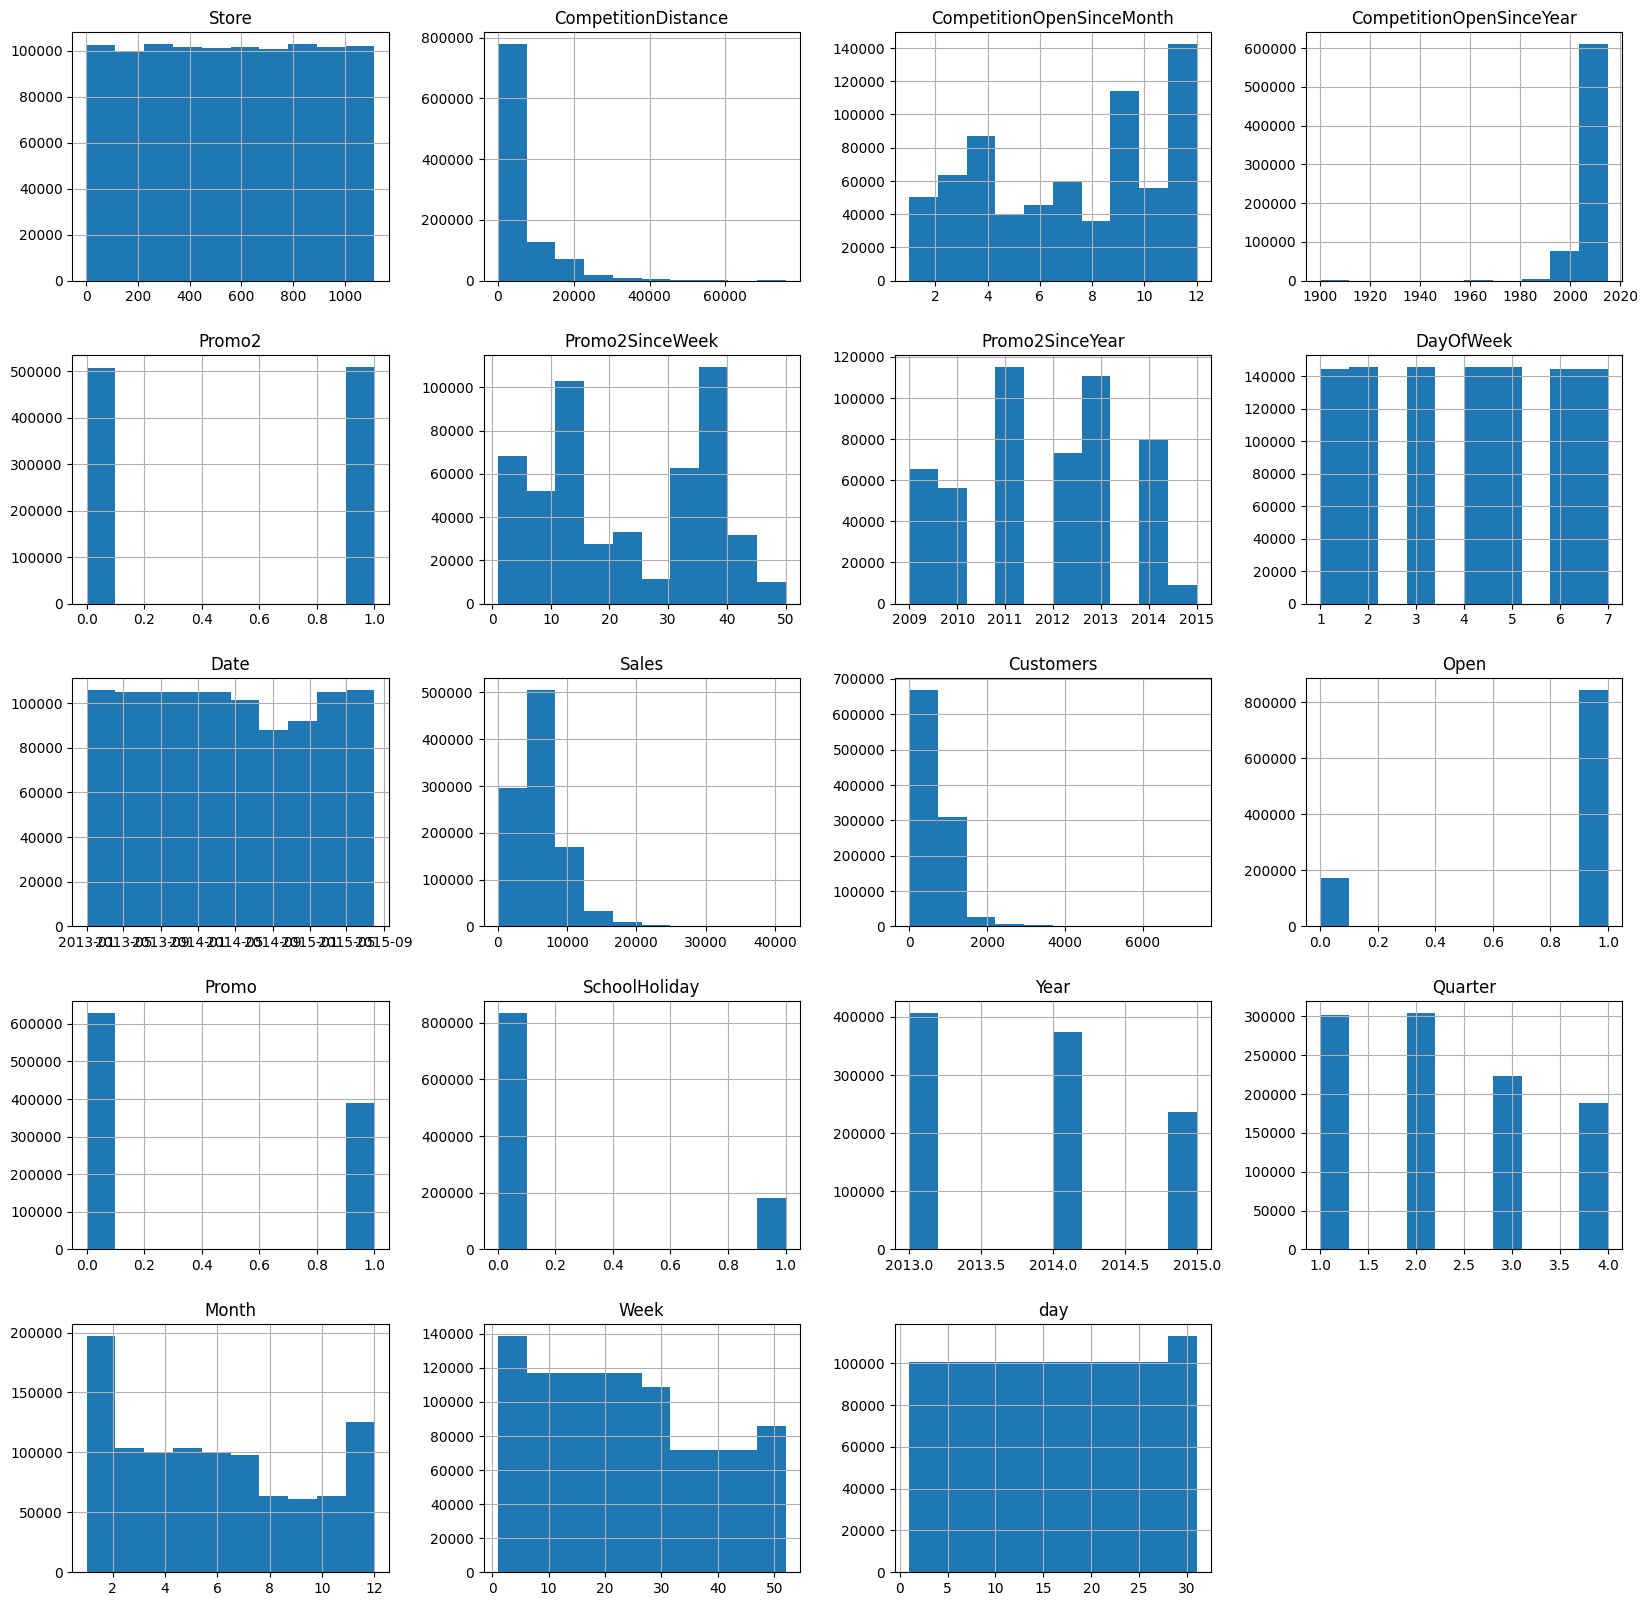

In [32]:
df.hist(figsize=(20,20));

In [33]:
df.isnull().sum() / df.shape[0] * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
Year                          0.000000
Quarter                       0.000000
Month                         0.000000
Week                          0.000000
day                           0.000000
Season                        0.000000
dtype: float64

<Axes: ylabel='CompetitionDistance'>

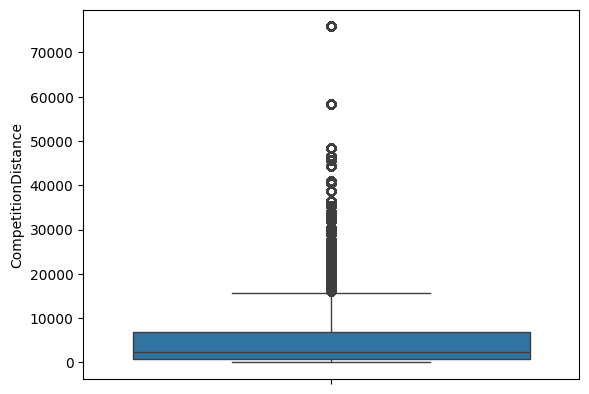

In [34]:
sns.boxplot(df['CompetitionDistance'])

In [35]:
df['CompetitionDistance'] = df['CompetitionDistance'].replace(np.NaN,df['CompetitionDistance'].mode()[0])

In [36]:
# df["CompetitionDistance"]=df["CompetitionDistance"].fillna(df["CompetitionDistance"].mode()[0])

In [37]:
df['CompetitionDistance'].isnull().sum() / df.shape[0] * 100

0.0

<Axes: xlabel='Season', ylabel='Sales'>

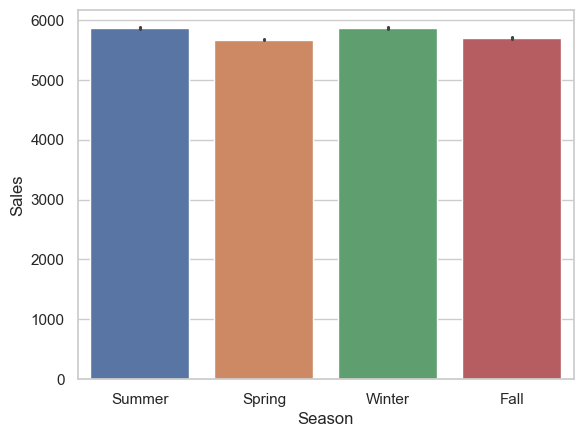

In [38]:
sns.set(style='whitegrid')
sns.barplot(df,x='Season',y='Sales',palette='deep')

<Axes: xlabel='Assortment', ylabel='Sales'>

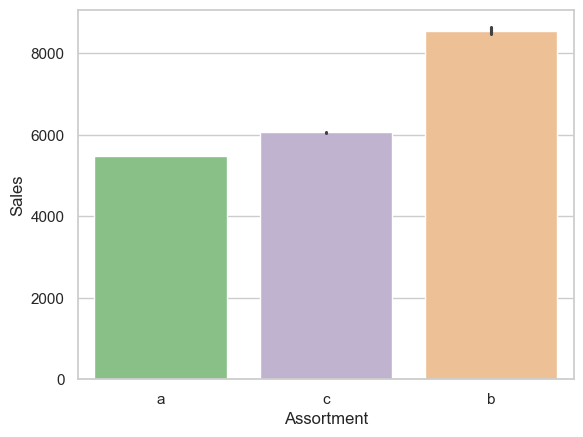

In [39]:
sns.barplot(df,x='Assortment',y='Sales',palette='Accent')

<Axes: xlabel='StoreType', ylabel='Sales'>

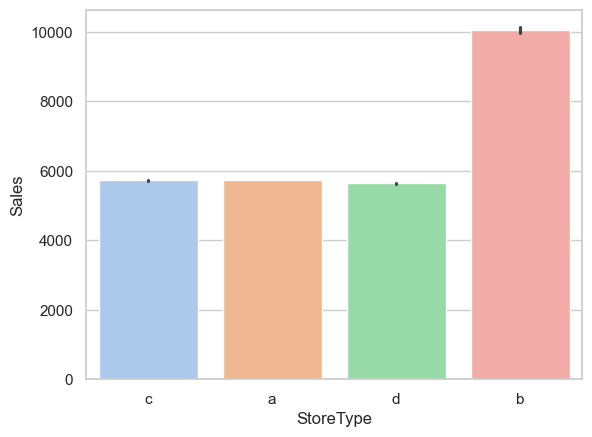

In [40]:
sns.barplot(df,x='StoreType',y='Sales',palette='pastel')

<Axes: xlabel='Season', ylabel='Sales'>

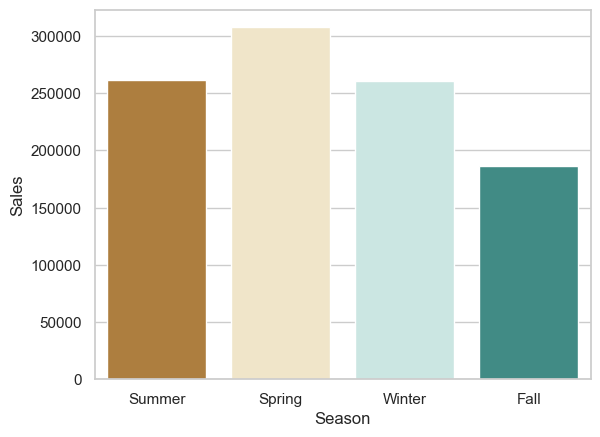

In [41]:
sns.barplot(df,x='Season',y='Sales',estimator=np.size,palette='BrBG')

<Axes: xlabel='Season', ylabel='Sales'>

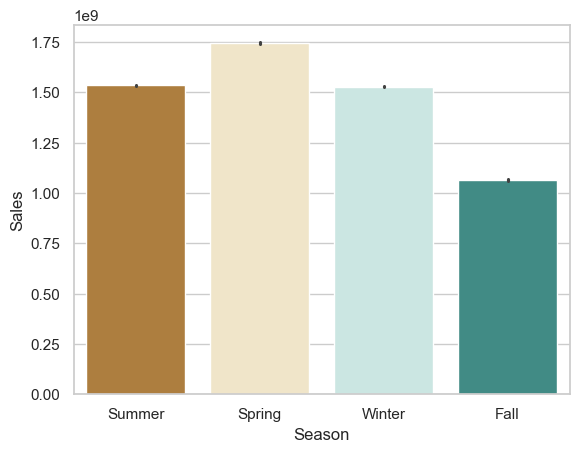

In [42]:
sns.barplot(df,x='Season',y='Sales',estimator='sum',palette='BrBG')

<Axes: xlabel='StoreType', ylabel='Sales'>

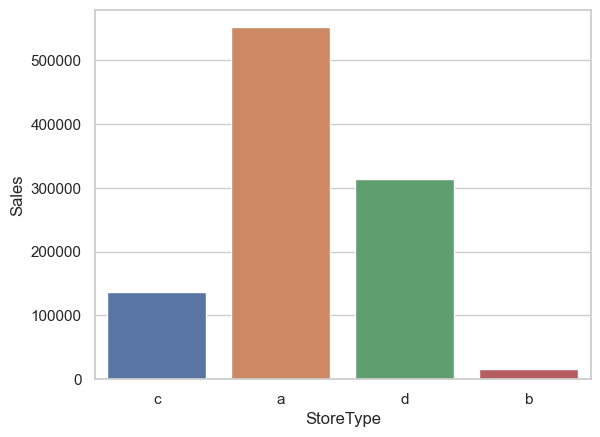

In [43]:
sns.barplot(df,x='StoreType',y='Sales',palette='deep',estimator=np.size)

In [44]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Quarter,Month,Week,day,Season
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1,2015,3,7,31,31,Summer
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1,2015,3,7,31,30,Summer
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1,2015,3,7,31,29,Summer
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1,2015,3,7,31,28,Summer
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1,2015,3,7,31,27,Summer


In [45]:
df.dtypes

Store                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int32
Quarter                               int32
Month                                 int32
Week                                 UInt32
day                             

In [46]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [47]:
cat_col = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

In [48]:
num_col = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]

In [49]:
for x in cat_col:
    temp = pd.get_dummies(df[x])

In [50]:
temp = pd.get_dummies(df[cat_col],columns=cat_col,dtype=int)

In [51]:
temp

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2013,Year_2014,Year_2015,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1017205,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1017206,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1017207,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [52]:
temp.shape

(1017209, 37)

In [53]:
final_df = pd.concat([df[num_col],temp],axis=1)

In [54]:
final_df.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2013,Year_2014,Year_2015,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,555,1,1,0,0,1,1270.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,546,1,1,0,0,1,1270.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,523,1,1,0,0,1,1270.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
3,560,1,1,0,0,1,1270.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,612,1,1,0,0,1,1270.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [55]:
final_df.shape

(1017209, 44)

In [56]:
df['Date'].dt.dayofweek,df['DayOfWeek']

(0          4
 1          3
 2          2
 3          1
 4          0
           ..
 1017204    5
 1017205    4
 1017206    3
 1017207    2
 1017208    1
 Name: Date, Length: 1017209, dtype: int32,
 0          5
 1          4
 2          3
 3          2
 4          1
           ..
 1017204    6
 1017205    5
 1017206    4
 1017207    3
 1017208    2
 Name: DayOfWeek, Length: 1017209, dtype: int64)

In [57]:
final_df.dtypes

Customers                int64
Open                     int64
Promo                    int64
Promo2                   int64
StateHoliday            object
SchoolHoliday            int64
CompetitionDistance    float64
DayOfWeek_1              int32
DayOfWeek_2              int32
DayOfWeek_3              int32
DayOfWeek_4              int32
DayOfWeek_5              int32
DayOfWeek_6              int32
DayOfWeek_7              int32
Quarter_1                int32
Quarter_2                int32
Quarter_3                int32
Quarter_4                int32
Month_1                  int32
Month_2                  int32
Month_3                  int32
Month_4                  int32
Month_5                  int32
Month_6                  int32
Month_7                  int32
Month_8                  int32
Month_9                  int32
Month_10                 int32
Month_11                 int32
Month_12                 int32
Year_2013                int32
Year_2014                int32
Year_201

In [58]:
final_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [59]:
a =pd.Series( final_df['StateHoliday'].replace({"0":0,'a':1,"b":1,'c':1}))

In [60]:
a.value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

In [61]:
b = pd.Series(np.where(final_df['StateHoliday'] == '0' , 0 , 1 ))

In [62]:
b.value_counts()

0    855087
1    162122
Name: count, dtype: int64

In [63]:
mapper = {"0":0,'a':1,"b":1,'c':1,0:0}

In [64]:
b = df['StateHoliday'].map(mapper)

In [65]:
b.value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

In [66]:
final_df['StateHoliday'] = df['StateHoliday'].apply(lambda x : 0 if x in ['0',0] else 1)

In [67]:
final_df['StateHoliday'].value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

In [68]:
final_df.columns 

Index(['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Quarter_1',
       'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Year_2013', 'Year_2014',
       'Year_2015', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [69]:
final_df.shape

(1017209, 44)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(final_df,df[['Sales']],test_size=0.2,random_state=9090)

In [72]:
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,test_size=0.1,random_state=909)

In [73]:
xtrain.shape , xval.shape , xtest.shape

((732390, 44), (81377, 44), (203442, 44))

In [74]:
ytrain.shape , yval.shape , ytest.shape

((732390, 1), (81377, 1), (203442, 1))

In [75]:
ytrain.mean()

Sales    5773.521352
dtype: float64

In [76]:
abs(ytrain - ytrain.mean()).mean()

Sales    2888.215159
dtype: float64

In [77]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [78]:
model = Sequential()

In [79]:
model.add(Dense(150,input_dim=44,activation='relu'))

In [80]:
model.add(Dense(1,activation='linear'))

In [81]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [82]:
model.fit(xtrain.values,ytrain.values,validation_data=(xval,yval),batch_size=64,epochs=10)

Epoch 1/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1210.2614 - mean_absolute_error: 1210.2614 - val_loss: 850.5189 - val_mean_absolute_error: 850.5189
Epoch 2/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 811.5108 - mean_absolute_error: 811.5108 - val_loss: 747.0541 - val_mean_absolute_error: 747.0541
Epoch 3/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 747.3748 - mean_absolute_error: 747.3748 - val_loss: 734.0901 - val_mean_absolute_error: 734.0901
Epoch 4/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 729.9717 - mean_absolute_error: 729.9717 - val_loss: 763.9467 - val_mean_absolute_error: 763.9467
Epoch 5/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 718.7319 - mean_absolute_error: 718.7319 - val_loss: 707.6964 - val_mean_absolute_error: 707.6964
Epoch 6/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 711.3533 - mean_absolute_error: 711.3533 - val_loss: 704.2588 - val_mean_absolute_error: 704.2588
Epoch 7/10
11444/114

In [83]:
result = model.evaluate(xtest,ytest)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 6s 997us/step - loss: 677.0242 - mean_absolute_error: 677.0242


In [84]:
model.metrics_names,result

(['loss', 'compile_metrics'], [675.2410888671875, 675.2410888671875])

In [85]:
model = Sequential()

In [86]:
model.add(Dense(300,input_dim=44,activation='relu'))

In [87]:
model.add(Dense(300,activation='relu'))

In [88]:
model.add(Dense(100,activation='relu'))

In [89]:
model.add(Dense(1,activation='linear'))

In [90]:
model.compile(optimizer='adamax',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [91]:
history = model.fit(xtrain,ytrain,validation_data=(xval,yval),batch_size=128,epochs=10)

Epoch 1/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 3751627.0000 - mean_absolute_error: 1147.4142 - val_loss: 1554974.3750 - val_mean_absolute_error: 826.9277
Epoch 2/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 1461124.3750 - mean_absolute_error: 806.4940 - val_loss: 1225926.0000 - val_mean_absolute_error: 748.0925
Epoch 3/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 1218968.5000 - mean_absolute_error: 741.1538 - val_loss: 1370388.7500 - val_mean_absolute_error: 814.5691
Epoch 4/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 1127143.0000 - mean_absolute_error: 716.3354 - val_loss: 1058009.8750 - val_mean_absolute_error: 693.0123
Epoch 5/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1084755.5000 - mean_absolute_error: 703.7410 - val_loss: 1057124.5000 - val_mean_absolute_error: 694.4177
Epoch 6/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1063051.1250 - mean_absolute_error: 696.4049 - val_loss: 1001979.5625 - val_mean_absolute_e

In [92]:
from keras.callbacks import History

In [93]:
history = History()

In [94]:
model = Sequential()

In [95]:
model.add(Dense(150,input_dim=44 ,activation='relu'))

In [96]:
model.add(Dense(150,activation='relu'))

In [97]:
model.add(Dense(150,activation='relu'))

In [98]:
model.add(Dense(150,activation='relu'))

In [99]:
model.add(Dense(1,activation='linear'))

In [100]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [101]:
model.fit(xtrain,ytrain,validation_data=(xval,yval),batch_size=32,epochs=15,callbacks=[history])

Epoch 1/15
22888/22888 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 920.3929 - mean_absolute_error: 920.3929 - val_loss: 743.6246 - val_mean_absolute_error: 743.6246
Epoch 2/15
22888/22888 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 723.5856 - mean_absolute_error: 723.5856 - val_loss: 827.5822 - val_mean_absolute_error: 827.5822
Epoch 3/15
22888/22888 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 702.8343 - mean_absolute_error: 702.8343 - val_loss: 697.9416 - val_mean_absolute_error: 697.9416
Epoch 4/15
22888/22888 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 688.4307 - mean_absolute_error: 688.4307 - val_loss: 806.4985 - val_mean_absolute_error: 806.4985
Epoch 5/15
22888/22888 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 683.5530 - mean_absolute_error: 683.5530 - val_loss: 688.3882 - val_mean_absolute_error: 688.3882
Epoch 6/15
22888/22888 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 676.2978 - mean_absolute_error: 676.2978 - val_loss: 662.3742 - val_mean_absolute_error: 662.3742
Epoch 7/15
22888/22888

In [102]:
history.history['loss']

[810.3778686523438,
 716.459228515625,
 699.2147216796875,
 688.8088989257812,
 681.2658081054688,
 675.8306884765625,
 671.3143920898438,
 667.1490478515625,
 663.2234497070312,
 660.1201171875,
 656.9741821289062,
 654.0176391601562,
 651.4555053710938,
 648.0194091796875,
 646.12939453125]

In [104]:
history.history['val_loss']

[743.6246337890625,
 827.5822143554688,
 697.9415893554688,
 806.49853515625,
 688.3882446289062,
 662.3742065429688,
 662.4815063476562,
 690.0872802734375,
 649.11572265625,
 649.162353515625,
 641.8765869140625,
 649.8489990234375,
 642.76416015625,
 646.2867431640625,
 652.97119140625]

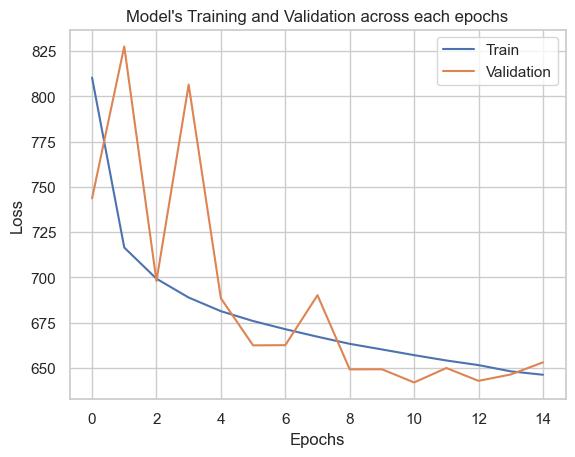

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model\'s Training and Validation across each epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

In [106]:
ytest.head()

,Sales
840890,4025
17618,3400
821554,4137
815405,11724
477770,7611


In [107]:
ytest['Prediction'] = model.predict(xtest)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 6s 955us/step


In [108]:
ytest.head()

,Sales,Prediction
840890,4025,3834.805664
17618,3400,3342.682617
821554,4137,5336.414551
815405,11724,9708.856445
477770,7611,6730.034668


In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [113]:
print(mean_absolute_error(ytest.Sales,ytest.Prediction))

648.97559051656


In [114]:
print(mean_squared_error(ytest.Sales,ytest.Prediction))

975799.264012335


In [116]:
model.save('my_model.h5')